In [3]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q-kqc/internal/default',
)

In [4]:
n_qubits = [27,127,433]
devices = ["ibmq_kolkata","ibm_nazca","ibm_seattle"]

In [167]:
circuits = [] 
for i in range(3):
    qc = QuantumCircuit(n_qubits[i],10)
    for j in range(n_qubits[i]):
        qc.x(j)
    qc.measure(range(10),range(10))
    circuits += [qc]
circuits1 = circuits

In [ ]:
circuits = circuits1

jobs = [] 
options = Options(optimization_level=3, resilience_level=1)
for i in range(3):
    with Session(backend = service.backend(devices[i])):
        sampler = Sampler(options=options)
        s_job = sampler.run(circuits[i])
    jobs += [s_job]
    print(f"Device {i+1} Job id: {s_job.job_id()}")

In [ ]:
circuits = circuits1

jobs = [] 
options = Options(optimization_level=3, resilience_level=0)
for i in range(3):
    with Session(backend = service.backend(devices[i])):
        sampler = Sampler(options=options)
        s_job = sampler.run(circuits[i])
    jobs += [s_job]
    print(f"Device {i+1} Job id: {s_job.job_id()}")

In [15]:
circuits = [] 
for i in range(3):
    qc = QuantumCircuit(n_qubits[i],10)
    for j in range(n_qubits[i]):
        qc.h(j)
    qc.measure(range(10),range(10))
    circuits += [qc]
circuits2 = circuits

In [16]:
circuits = circuits2

jobs = [] 
options = Options(optimization_level=3, resilience_level=1)
for i in range(3):
    with Session(backend = service.backend(devices[i])):
        sampler = Sampler(options=options)
        s_job = sampler.run(circuits[i])
    jobs += [s_job]
    print(f"Device {i+1} Job id: {s_job.job_id()}")

Device 1 Job id: ci1c3i1cinbchsh2sd40
Device 2 Job id: ci1c3i9cinbchsh2sd9g
Device 3 Job id: ci1c3i8ihcilpv6btglg


In [17]:
circuits = circuits2

jobs = [] 
options = Options(optimization_level=3, resilience_level=0)
for i in range(3):
    with Session(backend = service.backend(devices[i])):
        sampler = Sampler(options=options)
        s_job = sampler.run(circuits[i])
    jobs += [s_job]
    print(f"Device {i+1} Job id: {s_job.job_id()}")

Device 1 Job id: ci1c3iilnlj7ii9flcs0
Device 2 Job id: ci1c3ioihcilpv6btgv0
Device 3 Job id: ci1c3ip3lqnvrkoko980


In [87]:
circuits = [] 
for i in range(3):
    qc = QuantumCircuit(n_qubits[i],10)
    for j in range(n_qubits[i]):
        qc.h(j)
        if j != 0:
            qc.cx(0,j)
    qc.measure(range(10),range(10))
    circuits += [qc]
circuits3 = circuits

In [92]:
circuits = circuits3

jobs = [] 
options = Options(optimization_level=3, resilience_level=1)
for i in range(3):
    with Session(backend = service.backend(devices[i])):
        sampler = Sampler(options=options)
        s_job = sampler.run(circuits[i])
    jobs += [s_job]
    print(f"Device {i+1} Job id: {s_job.job_id()}")

Device 1 Job id: ci3b2413lqnvrkqc0avg
Device 2 Job id: ci3b249cinbchsiopljg
Device 3 Job id: ci3b2493lqnvrkqc0b7g


In [93]:
circuits = circuits3

jobs = [] 
options = Options(optimization_level=3, resilience_level=0)
for i in range(3):
    with Session(backend = service.backend(devices[i])):
        sampler = Sampler(options=options)
        s_job = sampler.run(circuits[i])
    jobs += [s_job]
    print(f"Device {i+1} Job id: {s_job.job_id()}")

Device 1 Job id: ci3b24gihcilpv01hk0g
Device 2 Job id: ci3b24p3lqnvrkqc0be0
Device 3 Job id: ci3b24p3lqnvrkqc0big


In [5]:
job_id = ["ci1c2milnlj7ii9fkjj0","ci1c2mukcccjrh119d00","ci1c35gihcilpv6bt4i0","ci1c35u1o26hu32aosb0","ci1c3i1cinbchsh2sd40","ci1c3i9cinbchsh2sd9g","ci1c3iilnlj7ii9flcs0","ci1c3ioihcilpv6btgv0","ci3b2413lqnvrkqc0avg","ci3b249cinbchsiopljg","ci3b24gihcilpv01hk0g","ci3b24p3lqnvrkqc0be0"]

In [41]:
index_table = pd.DataFrame([[[format(i, '#012b')[2:] for i in s_result.quasi_dists[0].keys()][k][j]=="0" for j in range(10)] for k in range(len(s_result.quasi_dists[0]))])
[sum(np.array(list(s_result.quasi_dists[0].values()))[index_table.iloc[:,i].values]) for i in range(10)]

In [7]:
result = []

for i in range(12):
    job = service.job(job_id[i])
    s_result = job.result()
    index_table = pd.DataFrame([[[format(i, '#012b')[2:] for i in s_result.quasi_dists[0].keys()][k][j]=="1" for j in range(10)] for k in range(len(s_result.quasi_dists[0]))])
    result += [[sum(np.array(list(s_result.quasi_dists[0].values()))[index_table.iloc[:,i].values]) for i in range(10)]]

In [9]:
result = pd.DataFrame(result)
result["device"] = ["Kolkata","Nazca","Kolkata","Nazca","Kolkata","Nazca","Kolkata","Nazca","Kolkata","Nazca","Kolkata","Nazca"]
result["resilence"] = [1,1,0,0,1,1,0,0,1,1,0,0]
result["test_type"] = ["x_test","x_test","x_test","x_test","h_test","h_test","h_test","h_test","cx_test","cx_test","cx_test","cx_test"]

In [10]:
result

,0,1,2,3,4,5,6,7,8,9,device,resilence,test_type
0,0.994448,0.963609,0.992891,0.991868,0.964012,0.988824,0.993855,0.997895,1.000552,1.001752,Kolkata,1,x_test
1,0.790646,0.986763,0.958818,1.000653,0.994646,0.919160,0.991253,0.973861,1.116590,1.006289,Nazca,1,x_test
2,0.864750,0.955250,0.969500,0.938750,0.938000,0.947750,0.977000,0.956000,0.984750,0.950000,Kolkata,0,x_test
3,0.711000,0.815500,0.832250,0.897750,0.853500,0.895000,0.983750,0.974750,0.939000,0.909500,Nazca,0,x_test
4,0.491829,0.475701,0.492545,0.495747,0.467230,0.491312,0.489392,0.496031,0.492793,0.493000,Kolkata,1,h_test
5,0.365177,0.540259,0.489887,0.475512,0.521431,0.546605,0.497087,0.562272,0.481627,0.500418,Nazca,1,h_test
6,0.527750,0.535000,0.541750,0.497750,0.503000,0.503000,0.573500,0.496250,0.481750,0.489250,Kolkata,0,h_test
7,0.452250,0.406750,0.517750,0.518750,0.476750,0.557500,0.520000,0.572000,0.485750,0.489250,Nazca,0,h_test
8,0.465397,0.492003,0.461987,0.430805,0.514230,0.473057,0.506235,0.502848,0.508009,0.016433,Kolkata,1,cx_test
9,0.497067,0.500166,0.405965,0.504563,0.498810,0.510840,0.503513,0.504028,0.495038,0.492283,Nazca,1,cx_test


In [12]:
plot_data = pd.DataFrame(result.iloc[:,:10].values.flatten())
plot_data["device"] = [i for i in result["device"].values for j in range(10)]
plot_data["resilience"] = [i for i in result["resilence"].values for j in range(10)]
plot_data["test_type"] = [i for i in result["test_type"].values for j in range(10)]
plot_data["qubit"] = [i  for j in range(12) for i in range(10) ]
plot_data.columns = ["ratio"]+plot_data.columns[1:].values.tolist()

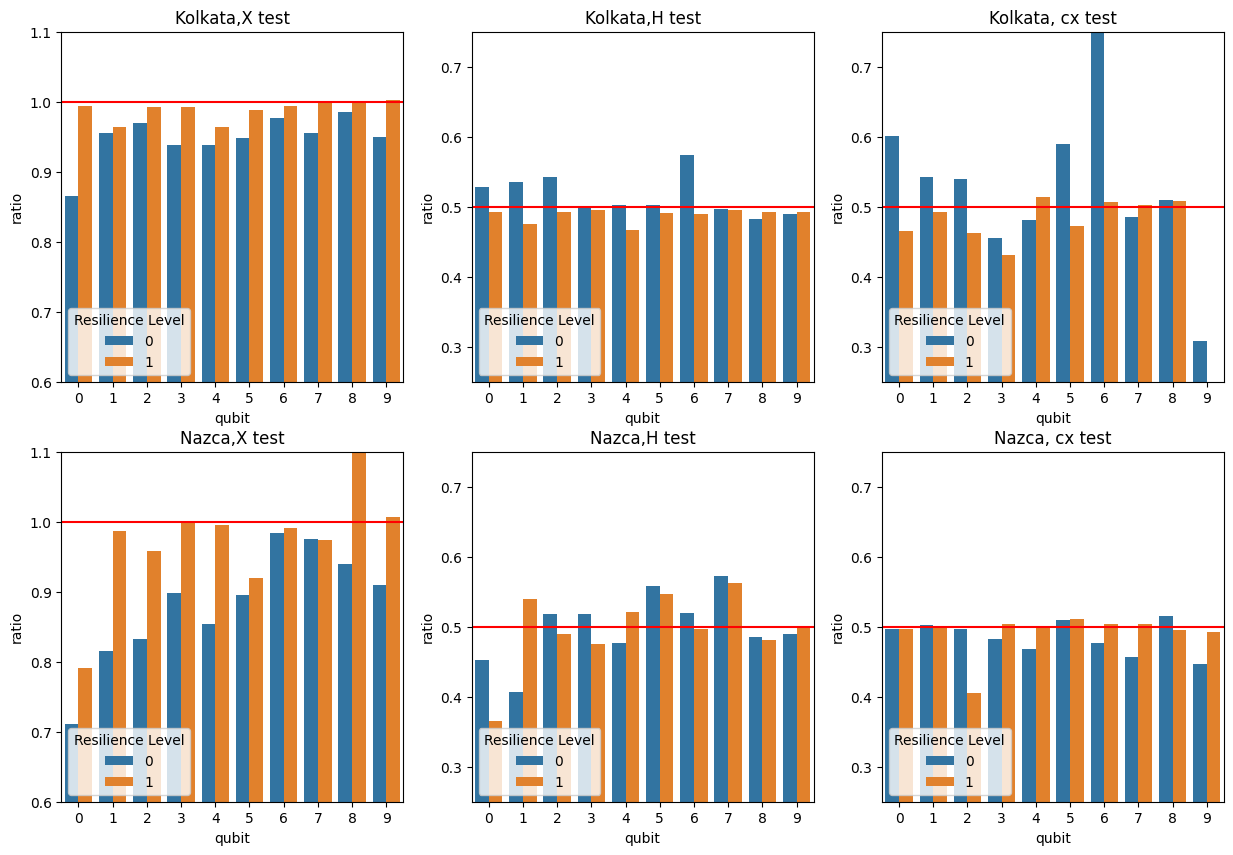

In [15]:
plt.figure(figsize=(15,10))

plt.subplot(231)
sns.barplot(x="qubit",y="ratio",hue="resilience",data=plot_data.loc[plot_data["device"]=="Kolkata",:].iloc[:20,:])
plt.axhline(1.0,-0.5,9.5,color="red")
plt.legend(loc = 3,title='Resilience Level')
plt.ylim(0.6,1.1)
plt.title("Kolkata,X test")

plt.subplot(232)
sns.barplot(x="qubit",y="ratio",hue="resilience",data=plot_data.loc[plot_data["device"]=="Kolkata",:].iloc[20:40,:])
plt.axhline(0.5,-0.5,9.5,color="red")
plt.legend(loc = 3,title='Resilience Level')
plt.ylim(0.25,0.75)
plt.title("Kolkata,H test")

plt.subplot(233)
sns.barplot(x="qubit",y="ratio",hue="resilience",data=plot_data.loc[plot_data["device"]=="Kolkata",:].iloc[40:60,:])
plt.axhline(0.5,-0.5,9.5,color="red")
plt.legend(loc = 3,title='Resilience Level')
plt.ylim(0.25,0.75)
plt.title("Kolkata, cx test")

plt.subplot(234)
sns.barplot(x="qubit",y="ratio",hue="resilience",data=plot_data.loc[plot_data["device"]=="Nazca",:].iloc[:20,:])
plt.axhline(1.0,-0.5,9.5,color="red")
plt.legend(loc = 3,title='Resilience Level')
plt.ylim(0.6,1.1)
plt.title("Nazca,X test")

plt.subplot(235)
sns.barplot(x="qubit",y="ratio",hue="resilience",data=plot_data.loc[plot_data["device"]=="Nazca",:].iloc[20:40,:])
plt.axhline(0.5,-0.5,9.5,color="red")
plt.legend(loc = 3,title='Resilience Level')
plt.ylim(0.25,0.75)
plt.title("Nazca,H test")


plt.subplot(236)
sns.barplot(x="qubit",y="ratio",hue="resilience",data=plot_data.loc[plot_data["device"]=="Nazca",:].iloc[40:60,:])
plt.axhline(0.5,-0.5,9.5,color="red")
plt.legend(loc = 3,title='Resilience Level')
plt.ylim(0.25,0.75)
plt.title("Nazca, cx test")


plt.show()

In [ ]:
sns.barplot(x="qubit",y=0,hue="resilience",data=plot_data.loc[plot_data["device"]=="Kolkata",:].iloc[:20,:])
plt.axhline(1.0,-0.5,9.5,color="red")
plt.legend(loc = 3)
plt.show()

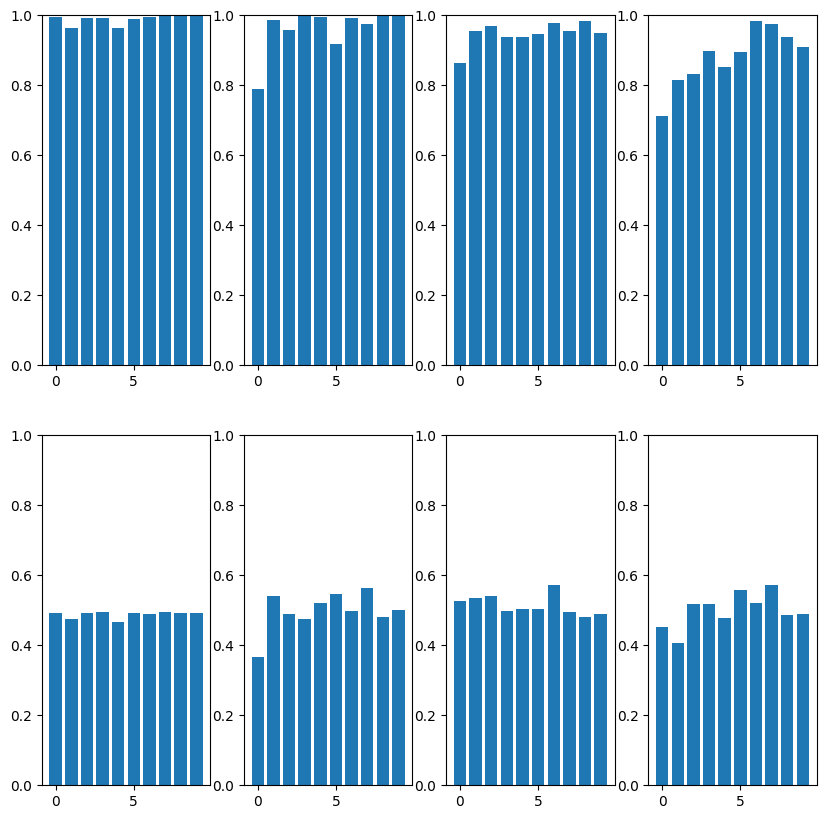

In [63]:
plt.figure(figsize=(10,10))

for i in range(8):
    job = service.job(job_id[i])
    s_result = job.result()
    index_table = pd.DataFrame([[[format(i, '#012b')[2:] for i in s_result.quasi_dists[0].keys()][k][j]=="1" for j in range(10)] for k in range(len(s_result.quasi_dists[0]))])
    plt.subplot(2,4,i+1)
    plt.bar(x=range(10),height=[sum(np.array(list(s_result.quasi_dists[0].values()))[index_table.iloc[:,i].values]) for i in range(10)])
    plt.ylim(0,1)
    
plt.show()

In [236]:
result = []
for i in range(4) :
    job = service.job(job_id[i])
    s_result = job.result()
    result += [s_result.quasi_dists[0][1023]]


In [248]:
ratio = pd.DataFrame(result)
ratio.columns = ["ratio"]
ratio["Device"] = ["Kolkata","Nazca","Kolkata","Nazca"]
ratio["Resilience Level"] = [1,1,0,0] 


In [250]:
ratio

,ratio,Device,Resilience Level
0,0.909355,Kolkata,1
1,0.789001,Nazca,1
2,0.581000,Kolkata,0
3,0.260500,Nazca,0


In [253]:
result = pd.DataFrame(ratio["ratio"].values.reshape(2,2))
result.columns = ["Kolkata","Nazca"]
result.index = ["Resilience Level = 1","Resilience Level = 0"]
result

,Kolkata,Nazca
Resilience Level = 1,0.909355,0.789001
Resilience Level = 0,0.581000,0.260500


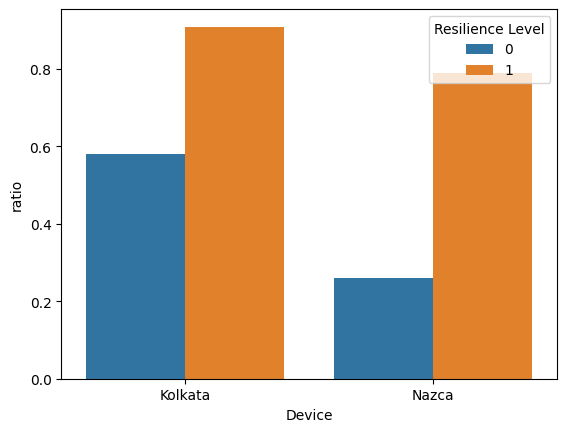

In [246]:
sns.barplot(data = ratio, x = "Device" , y = "ratio", hue = "Resilience Level")
plt.show()

In [9]:
result = []
for i in range(4) :
    job = service.job(job_id[i+4])
    s_result = job.result()
    frame = pd.DataFrame([1/1024 for i in range(1024)],columns = ["theo"])
    df = pd.DataFrame([0 for i in range(1024)],columns=['test'])
    for key, value in s_result.quasi_dists[0].items():
        df.loc[key] = value

    frame["test"] = df
    result += [np.sqrt(sum((frame["test"]-frame["theo"])**2))]
result = 1-np.array(result)

In [10]:
ratio = pd.DataFrame(result)
ratio.columns = ["ratio"]
ratio["Device"] = ["Kolkata","Nazca","Kolkata","Nazca"]
ratio["Resilience Level"] = [1,1,0,0] 


In [11]:
ratio

,ratio,Device,Resilience Level
0,0.965590,Kolkata,1
1,0.930827,Nazca,1
2,0.982808,Kolkata,0
3,0.981257,Nazca,0


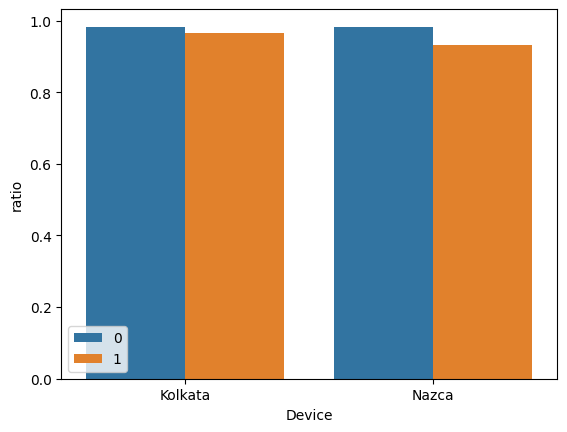

In [12]:
sns.barplot(data = ratio, x = "Device" , y = "ratio", hue = "Resilience Level")
plt.legend(loc=3)
plt.show()

In [13]:
result = []
for i in range(4) :
    job = service.job(job_id[i+8])
    s_result = job.result()
    frame = pd.DataFrame([1/1024 for i in range(1024)],columns = ["theo"])
    df = pd.DataFrame([0 for i in range(1024)],columns=['test'])
    for key, value in s_result.quasi_dists[0].items():
        df.loc[key] = value

    frame["test"] = df
    result += [np.sqrt(sum((frame["test"]-frame["theo"])**2))]
result = 1-np.array(result)

In [14]:
ratio = pd.DataFrame(result)
ratio.columns = ["ratio"]
ratio["Device"] = ["Kolkata","Nazca","Kolkata","Nazca"]
ratio["Resilience Level"] = [1,1,0,0] 
ratio

,ratio,Device,Resilience Level
0,0.957782,Kolkata,1
1,0.978244,Nazca,1
2,0.956512,Kolkata,0
3,0.983754,Nazca,0


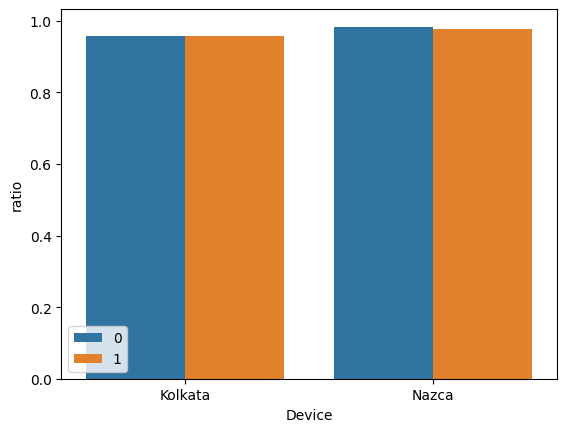

In [15]:
sns.barplot(data = ratio, x = "Device" , y = "ratio", hue = "Resilience Level")
plt.legend(loc=3)
plt.show()